In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import mcbe

from PIL import Image
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from random import randint
import random

In [2]:
#tetrahedron
W = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3)
alpha, alpha_list =  mcbe.mcbe(W,10000,return_alpha_list=True)

In [31]:
alpha_lists = []
for iter in tqdm(range(100)):
    W = np.array([[1,1,1],[-1,-1,1],[-1,1,-1],[1,-1,-1]])/np.sqrt(3)
    alpha, alpha_list =  mcbe.mcbe(W,10000,return_alpha_list=True)
    alpha_lists.append(alpha_list)

100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


In [32]:
alpha_lists = np.array(alpha_lists)
eucl_dis_lists = np.linalg.norm(np.subtract(alpha_lists,-1/(np.sqrt(3))),axis=2)
means = eucl_dis_lists.mean(axis=0)
stds = eucl_dis_lists.std(axis=0)

In [33]:

relative_dis_lists = np.linalg.norm(np.subtract(alpha_lists,-1/(np.sqrt(3))),axis=2)/np.linalg.norm([-1/(np.sqrt(3)),-1/(np.sqrt(3)),-1/(np.sqrt(3)),-1/(np.sqrt(3))])
relative_means = relative_dis_lists.mean(axis=0)
relative_stds = relative_dis_lists.std(axis=0)

In [36]:
plt.rcParams.update({'font.family':'Times New Roman', 'font.size': 22})

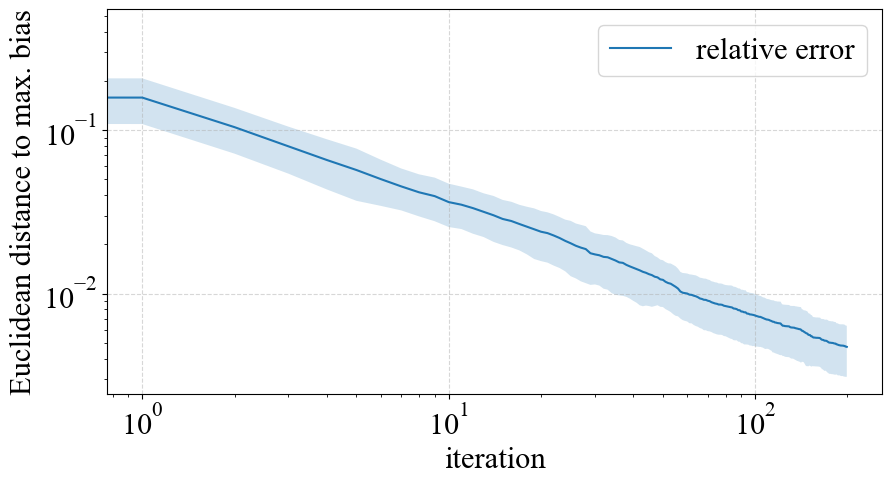

In [39]:
plt.figure(figsize=(10, 5))
#plt.plot(means,label="absolute error")
plt.plot(relative_means,label="relative error")
#plt.fill_between(np.arange(len(means)),means-stds,means+stds,alpha=0.2)
plt.fill_between(np.arange(len(relative_means)),relative_means-relative_stds,relative_means+relative_stds,alpha=0.2)
plt.xlabel("iteration")
plt.ylabel("Euclidean distance to max. bias")  
plt.grid(linestyle='--', alpha=0.5)
#change x ticks
plt.xticks([0,50,100,150,200],["0","2500","5000","7500","10000"])
#semilogy
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
